In [2]:
from sklearn import datasets

digits = datasets.load_digits()
# digits

标签为: 0


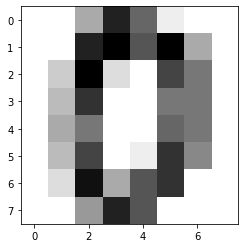

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

image1 = digits.images[0]
print("标签为:", digits.target[0])
plt.imshow(image1, cmap=plt.cm.gray_r)

In [19]:
import numpy as np


class FullyConnect:
    # 面向对象中的构造函数，初始化该类的时候，会被调用
    # 传入参数 len_x 为输入数据的特征长度（也就是第一层的神经元个数）
    # len_y 为输出数据的个数（也就是第二层的神经元个数）
    def __init__(self, len_x, len_y):
        # 使用随机数初始化参数，请暂时忽略这里为什么多了 np.sqrt(l_x)
        # 从上面的 w 的矩阵形式可以发现， m 个神经元的网络层到n个神经元的网络层之间的 w 矩阵的大小为( n*m )
        self.weights = np.random.randn(len_y, len_x) / np.sqrt(len_x)
        self.bias = np.random.randn(len_y, 1)  # 使用随机数初始化参数，bias 的个数之后输出层的个数有关
        self.lr = 0  # 先将学习速率初始化为 0 ，最后统一设置学习速率

    # 全连接的正向传播过程，输入的便是训练数据
    def forward(self, x):
        self.x = x  # 把中间结果保存下来，以备反向传播时使用
        # 计算全连接层的输出，也就是上面矩阵乘法公式的代码表示
        self.y = np.array([np.dot(self.weights, xx) + self.bias for xx in x])
        return self.y  # 将这一层计算的结果向前传递

In [20]:
digits.data[0:2].shape

(2, 64)

In [6]:
fully_connet = FullyConnect(64, 1)  # 传入网络层1，网络层2的长度
full_result = fully_connet.forward(digits.data[0:2])
full_result  # 这里只传入两条数据用于测试。得到产品v'p。一次正向传播后，两张图片的预测值

array([[[13.80675023]],

       [[13.27172982]]])

In [23]:
class Sigmoid:
    def __init__(self):  # 无参数，不需初始化
        pass
    # 这里输入的变量的 x，其实就是上面公式的 z

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # 完成正向传播，将输入的 z ，放入 Sigmoid 函数中，最终得到结果 h，并返回
    def forward(self, x):
        self.x = x
        self.y = self.sigmoid(x)
        return self.y

0.5


Text(0, 0.5, 'g(z)')

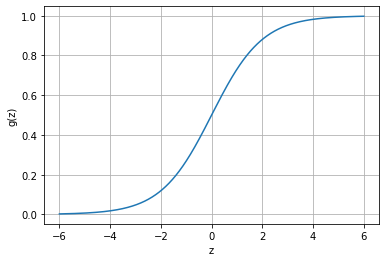

In [24]:
sig = Sigmoid()
print(sig.sigmoid(0))  # 当 z=0 时，正确输出应该是 0.5
%matplotlib inline
z = np.linspace(-6, 6, 1000)  # 生成等间距 z 值方便绘图
plt.plot(z, sig.sigmoid(z))
plt.grid(1)  # 生成网格，方便观察
plt.xlabel("z")
plt.ylabel("g(z)")

In [25]:
class QuadraticLoss:
    def __init__(self):
        pass
    # 传入的参数，第一个参数为预测出来的标签值，第二个参数为实际标签值
    def forward(self, x, label):
        # 将真实 label 转换成独热编码
        self.x = x
        # 由于我们的label本身只包含一个数字，我们需要将其转换成和模型输出值尺寸相匹配的向量形式
        self.label = np.zeros_like(x)
        for a, b in zip(self.label, label):
            a[b] = 1.0  # 只有正确标签所代表的位置概率为1，其他为 0
        # 计算损失
        self.loss = np.sum(np.square(x - self.label)) / \
            self.x.shape[0] / 2  # 求平均后再除以 2 是为了表示方便
        return self.loss

In [21]:
# 测试
loss = QuadraticLoss()
# 假设神经网络算出样本的预测值为0，即为晴天
pred = np.zeros((1, 4))
pred[0][0] = 1
print("实际为阴天和预测值为晴天的平均损失是：", loss.forward(pred, [1]))
print("实际为雪天和预测值为晴天的平均损失是：", loss.forward(pred, [2]))

实际为阴天和预测值为晴天的平均损失是： 1.0
实际为雪天和预测值为晴天的平均损失是： 1.0


In [26]:
class Accuracy:
    def __init__(self):
        pass

    def forward(self, x, label):  # 只需forward
        self.accuracy = np.sum(
            [np.argmax(xx) == ll for xx, ll in zip(x, label)])  # 对预测正确的实例数求和
        self.accuracy = 1.0 * self.accuracy / x.shape[0]  # 也就是计算正确率 ,公式 7 的实现
        return self.accuracy

In [27]:
# 图片大小为 8*8
# 则此时一张图片就是一条数据，每张图片对呀一个 label（0-9范围内）
x = digits.data
labels = digits.target

# 开始搭建神经网络
inner_layers = []
inner_layers.append(FullyConnect(8 * 8, 10))
inner_layers.append(Sigmoid())
# 神经网络搭建完成

losslayer = QuadraticLoss()  # 计算损失
accuracy = Accuracy()  # 计算准确率

# 开始将数据送入神经网络进行正向传播
for layer in inner_layers:  # 前向计算
    x = layer.forward(x)

loss = losslayer.forward(x, labels)  # 调用损失层forward函数计算损失函数值
accu = accuracy.forward(x, labels)
print('loss:', loss, 'accuracy:', accu)

loss: 16.00154339670781 accuracy: 0.07178631051752922


In [28]:
class QuadraticLoss:
    def __init__(self):
        pass
    # 正向传播和上文一样，具体注释参照上文
    def forward(self, x, label):
        self.x = x
        self.label = np.zeros_like(x)
        for a, b in zip(self.label, label):
            a[b] = 1.0
        # 对公式 8 实现
        self.loss = np.sum(np.square(x - self.label)) / \
        self.x.shape[0] / 2  # 求平均后再除以2是为了表示方便
        return self.loss

    # 定义反向传播
    def backward(self):
        # 这里的dx，就是我们求得函数关于x偏导数，也就是梯度，将它保存起来，后面更新的时候会用到
        self.dx = (self.x - self.label) / self.x.shape[0]  # 2被抵消掉了
        return self.dx

In [29]:
class Sigmoid:
    def __init__(self):  # 无参数，不需初始化
        pass
    # 即公式 5
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        self.x = x
        self.y = self.sigmoid(x)
        return self.y
    # 即公式 9
    def backward(self, d):
        sig = self.sigmoid(self.x)
        self.dx = d * sig * (1 - sig)
        return self.dx  # 反向传递梯度

In [31]:
train_data,train_target = digits.data[:1500],digits.target[:1500]
test_data,test_target = digits.data[1500:-1],digits.target[1500:-1]
train_data.shape,train_target.shape,test_data.shape,test_target.shape

((1500, 64), (1500,), (296, 64), (296,))

In [32]:
inner_layers = []
inner_layers.append(FullyConnect(64, 60)) # 因为每条数据的长度为 8*8=64，因此这里第一个全连接层，接收长度为64
inner_layers.append(Sigmoid())
inner_layers.append(FullyConnect(60, 10))
inner_layers.append(Sigmoid())
inner_layers

In [37]:
losslayer = QuadraticLoss()
accuracy = Accuracy()
for layer in inner_layers:
    layer.lr = 1000     #所有中间层设置学习速率
epochs = 350  # 对训练数据遍历的次数，也就是学习时间。
#在开始的时候，准确率会随之学习时间的增加而提高。
#当模型学习完训练数据中的所有信息后，准确率就会趋于稳定
losslayer,accuracy,epochs

(<__main__.QuadraticLoss at 0x7fc23c91fb20>,
 350)

In [38]:
for i in range(epochs):
   
    losssum = 0
    iters = 0
    x = train_data
    label = train_target
    x = x.reshape(-1,64,1)
    for layer in inner_layers:  # 前向计算
        x = layer.forward(x)
    loss = losslayer.forward(x, label)  # 调用损失层forward函数计算损失函数值
    losssum += loss
    iters += 1
    d = losslayer.backward()  # 调用损失层backward函数层计算将要反向传播的梯度

    for layer in inner_layers[::-1]:  # 反向传播
        d = layer.backward(d)

    if i%10==0: 
        x = test_data
        label = test_target
        x = x.reshape(-1,64,1)
        for layer in inner_layers:
            x = layer.forward(x)
            
        accu = accuracy.forward(x, label)  # 调用准确率层forward()函数求出准确率
        print('epochs:{},loss:{},test_accuracy:{}'.format(i,losssum / iters,accu))

epochs:0,loss:0.03198908237421847,test_accuracy:0.9087837837837838
epochs:10,loss:0.0311821036539467,test_accuracy:0.9121621621621622
epochs:20,loss:0.03041386168242786,test_accuracy:0.9121621621621622
epochs:30,loss:0.02968178795674537,test_accuracy:0.9121621621621622
epochs:40,loss:0.028983514926377248,test_accuracy:0.9121621621621622
epochs:50,loss:0.02831685310656628,test_accuracy:0.9121621621621622
epochs:60,loss:0.027679775432468755,test_accuracy:0.9121621621621622
epochs:70,loss:0.027070404017356275,test_accuracy:0.9121621621621622
epochs:80,loss:0.026486998128938885,test_accuracy:0.9121621621621622
epochs:90,loss:0.02592794330408344,test_accuracy:0.9121621621621622
epochs:100,loss:0.025391741525404465,test_accuracy:0.9121621621621622
epochs:110,loss:0.024877002191520982,test_accuracy:0.9121621621621622
epochs:120,loss:0.024382433561848528,test_accuracy:0.9121621621621622
epochs:130,loss:0.023906834459372056,test_accuracy:0.9121621621621622
epochs:140,loss:0.023449086184533285,t

##### 